# A Tutorial On Neural Networks

<img src='./brain.png'/>

# What is a Neural Network?

Human brain consists of neurons or nerve cells which transmit and process the information received from our senses. Many such nerve cells are arranged together in our brain to form a network of nerves. These nerves pass electrical impulses i.e the excitation from one neuron to the other.These network of nerves are known as __Biological Neural Network.__

To know more about working of neurons refer this link: https://www.khanacademy.org/science/biology/human-biology/neuron-nervous-system/a/overview-of-neuron-structure-and-function

<img src='./Neuron.png'/>

The machine learning algorithms of __Artificial Neural Network__ also uses the same concept of Network in __Biological Neuron__.
In this case , the neurons are created artificially on a computer . Connecting many such artificial neurons creates an __Artificial neural network__. The working of an artificial neuron is similar to that of a neuron present in our brain.

Without going deep into brain's Neuron, We simply describe Neural Networks as a mathematical function that maps a given input to a desired output.

Neural Networks consist of the following components

1) An input layer, x<br>
2) An arbitrary amount of hidden layers<br>
3) An output layer, ŷ<br>
4) A set of weights and biases between each layer, W and b<br>
5) A choice of activation function for each hidden layer, σ. 

The diagram below shows the architecture of a 2-layer Neural Network (note that the input layer is not included when counting the number of layers in a Neural Network)

<img src='./nn.png'/>

# Layers in Neural Networks

## 1)Input Layer
The input layer of a neural network is composed of artificial input neurons, and brings the initial data into the system for further processing by subsequent layers of artificial neurons. The input layer is the very beginning of the workflow for the artificial neural network.

One of the distinct characteristics of the input layer is that artificial neurons in the input layer have a different role to play – experts explain this as the input layer being constituted of “passive” neurons that do not take in information from previous layers because they are the very first layer of the network. In general, artificial neurons are likely to have a set of weighted inputs and function on the basis of those weighted inputs – however, in theory, an input layer can be composed of artificial neurons that do not have weighted inputs, or where weights are calculated differently, for example, randomly, because the information is coming into the system for the first time. What is common in the neural network model is that the input layer sends the data to subsequent layers, in which the neurons do have weighted inputs.

## 2)Hidden Layer
A hidden layer in an artificial neural network is a layer in between input layers and output layers, where artificial neurons take in a set of weighted inputs and produce an output through an activation function. It is a typical part of nearly any neural network in which engineers simulate the types of activity that go on in the human brain.

Hidden neural network layers are set up in many different ways. In some cases, weighted inputs are randomly assigned. In other cases, they are fine-tuned and calibrated through a process called backpropagation. Either way, the artificial neuron in the hidden layer works like a biological neuron in the brain – it takes in its probabilistic input signals, works on them and converts them into an output corresponding to the biological neuron’s axon.

Many analyses of machine learning models focus on the construction of hidden layers in the neural network. There are different ways to set up these hidden layers to generate various results – for instance, convolutional neural networks that focus on image processing, recurrent neural networks that contain an element of memory and simple feedforward neural networks that work in a straightforward way on training data sets.

## 3)Output Layer
The output layer in an artificial neural network is the last layer of neurons that produces given outputs for the program. Though they are made much like other artificial neurons in the neural network, output layer neurons may be built or observed in a different way, given that they are the last “actor” nodes on the network.

__End Note:__ A typical traditional neural network has three types of layers: one or more input layers, one or more hidden layers, and one or more output layers. Simple feedforward neural networks with three individual layers provide basic easy-to-understand models. More sophisticated, innovative neural networks may have more than one of any type of layer – and as mentioned, each type of layer may be built differently. A traditional artificial neuron is composed of some weighted inputs, a transformation function and activation function corresponding to the biological neuron’s axon. However, output layer neurons may be designed differently in order to streamline and improve the end results of the iterative process.

In a sense, the output layer coalesces and concretely produces the end result. However, to understand the neural network better, it is important to look at the input layer, hidden layers and output layer together as a whole

# Activation Function

__Single Neuron:__ The basic unit of computation in a neural network is the neuron, often called a node or unit. It receives input from some other nodes, or from an external source and computes an output. Each input has an associated weight (w), which is assigned on the basis of its relative importance to other inputs. The node applies a function f (defined below) to the weighted sum of its inputs as shown in Figure  below:

<img src='./activation.png'/>

The above network takes numerical inputs X1 and X2 and has weights w1 and w2 associated with those inputs. Additionally, there is another input 1 with weight b (called the Bias) associated with it.

The output Y from the neuron is computed as shown in the Figure. The function f is non-linear and is called the Activation Function. The purpose of the activation function is to introduce non-linearity into the output of a neuron. This is important because most real world data is non linear and we want neurons to learn these non linear representations.

Every activation function (or non-linearity) takes a single number and performs a certain fixed mathematical operation on it. There are several activation functions you may encounter in practice:

__Sigmoid:__ takes a real-valued input and squashes it to range between 0 and 1
σ(x) = 1 / (1 + exp(−x))

__tanh:__ takes a real-valued input and squashes it to the range [-1, 1]
tanh(x) = 2σ(2x) − 1

__ReLU:__ ReLU stands for Rectified Linear Unit. It takes a real-valued input and thresholds it at zero (replaces negative values with zero)
f(x) = max(0, x)

The below figures show each of the above activation functions:

<img src='./RELU.png'/>

__Importance of Bias__: The main function of Bias is to provide every node with a trainable constant value (in addition to the normal inputs that the node receives). See this link to learn more about the role of bias in a neuron.


# Neural Network from Scratch

__Why implement a Neural Network from scratch at all?__ Even if you plan on using Neural Network libraries like Keras,Tensorflow and Pytorch in the future, implementing a network from scratch at least once is an extremely valuable exercise. It helps you gain an understanding of how neural networks work, and that is essential to designing effective models.

One thing to note is that the code examples here aren't terribly efficient. They are meant to be easy to understand. In an upcoming post we will explore how to write an efficient Neural Network implementation using libraries.

In [12]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generating a dataset
Let's start by generating a dataset we can play with. We will use <a href="http://scikit-learn.org/">scikit-learn</a> for that process. We will go with the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html"><code>make_moons</code></a> function.

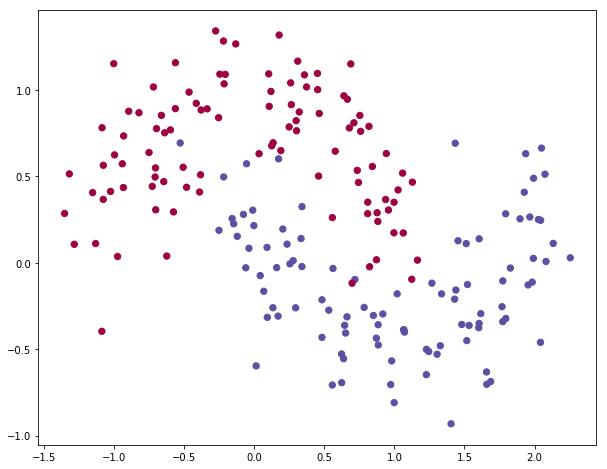

In [13]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

The dataset generates two class, plotted as red and blue points. You can think of the blue dots as male patients and the red dots as female patients, with the x- and y- axis being medical measurements.

The goal is to train a __Machine Learning classifier__ that predicts the correct class (male or female) given the x- and y- coordinates. Note that the data is not linearly separable, we can't draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In fact, that's one of the major advantages of __Neural Networks__. You don't need to worry about <a href="http://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/">feature engineering</a>. The hidden layer of a neural network will learn features for you.

## Logistic Regression
To demonstrate the point above let's train a Logistic Regression classifier. It's input will be the x- and y-values and the output the predicted class (0 or 1). To make our life easy we use the Logistic Regression class from scikit-learn.

In [14]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [15]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

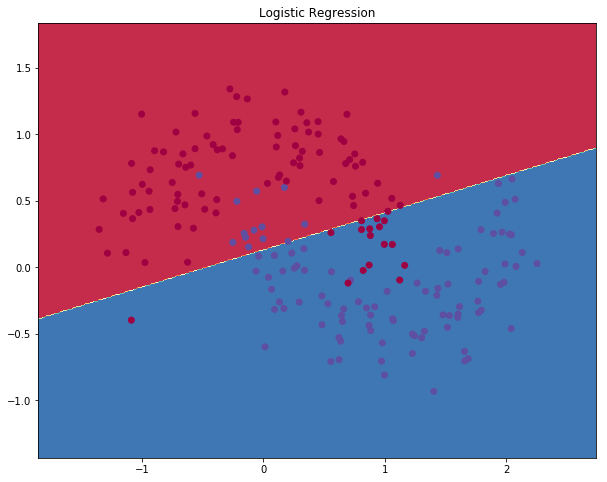

In [16]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

The graph shows the decision boundary learned by our Logistic Regression classifier. It separates the data as good as it can using a straight line, but it's unable to capture the "moon shape" of our data.

# Training a Neural Network

Let's now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data, 2. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. (Because we only have 2 classes we could actually get away with only one output node predicting 0 or 1, but having 2 makes it easier to extend the network to more classes later on). The input to the network will be x- and y- coordinates and its output will be two probabilities, one for class 0 ("female") and one for class 1 ("male"). It looks something like this:

<img src='./Example nn.png'/>

## Choosing Dimensionality of Hidden Layer
Now here the number of nodes or dimensionality of hidden layer can be choosen on our own. But more the number of hidden layer more is the complexity and also it leads to overfitting the data. 

How to choose the size of the hidden layer? While there are some general guidelines and recommendations, it always depends on your specific problem and is more of an art than a science. We will play with the number of nodes in the hidden layer later on and see how it affects our output.

## Picking Activation Function

A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are tanh, the sigmoid function, or ReLUs. We will use tanh, which performs quite well in many scenarios. The nicest property of tanh function is that we can compute it's derivative easily which will be useful in further computations.

Because we want our network to output probabilities the activation function for the output layer will be the softmax, which is simply a way to convert raw scores to probabilities. If you're familiar with the logistic function you can think of softmax as its generalization to multiple classes.

## How our network makes predictions
Our network makes predictions using forward propagation, which is just a bunch of matrix multiplications and the application of the activation function(s) we defined above. If $x$ is the 2-dimensional input to our network then we calculate our prediction $\hat{y}$ (also two-dimensional) as follows:

$$
\begin{aligned}
z_1 &amp; = xW_1 + b_1 \\
a_1 &amp; = \tanh(z_1) \\
z_2 &amp; = a_1W_2 + b_2 \\
a_2 &amp; = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$
$z_i$ is the weighted sum of inputs of layer $i$ (bias included) and $a_i$ is the output of layer $i$ after applying the activation function. $W_1, b_1, W_2, b_2$ are parameters of our network, which we need to learn from our training data. You can think of them as matrices transforming data between layers of the network. Looking at the matrix multiplications above we can figure out the dimensionality of these matrices. If we use 500 nodes for our hidden layer then $W_1 \in \mathbb{R}^{2\times500}$, $b_1 \in \mathbb{R}^{500}$, $W_2 \in \mathbb{R}^{500\times2}$, $b_2 \in \mathbb{R}^{2}$. Now you see why we have more parameters if we increase the size of the hidden layer.

## Learning the Parameters
Learning the parameters for our network means finding parameters ($W_1, b_1, W_2, b_2$) that minimize the error on our training data. But how do we define the error? We call the function that measures our error the loss function. A common choice with the softmax output is the cross-entropy loss. If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$
The formula looks complicated, but all it really does is sum over our training examples and add to the loss if we predicted the incorrect class. So, the further away $y$ (the correct labels) and $\hat{y}$ (our predictions) are, the greater our loss will be.

Remember that our goal is to find the parameters that minimize our loss function. We can use gradient descent to find its minimum. I will implement the most vanilla version of gradient descent, also called batch gradient descent with a fixed learning rate. Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also decay the learning rate over time.

As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. To calculate these gradients we use the famous backpropagation algorithm, which is a way to efficiently calculate the gradients starting from the output. I won't go into detail how backpropagation works, but there are many excellent explanations (here or here) floating around the web.

Applying the backpropagation formula we find the following (trust me on this):

$$
\begin{aligned}
&amp; \delta_3 = \hat{y} - y \\
&amp; \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
&amp; \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
&amp; \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
&amp; \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
&amp; \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

## Implementation
Now we are ready for our implementation. We start by defining some useful variables and parameters for gradient descent:

In [17]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

First let's implement the loss function we defined above. We use this to evaluate how well our model is doing:

In [18]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

We also implement a helper function to calculate the output of the network. It does forward propagation as defined above and returns the class with the highest probability.

In [19]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

Finally, here comes the function to train our Neural Network. It implements batch gradient descent using the backpropagation derivates we found above.

In [20]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

## A network with a hidden layer of size 3
Let's see what happens if we train a network with a hidden layer size of 3.

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.069033
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


Text(0.5,1,'Decision Boundary for hidden layer size 3')

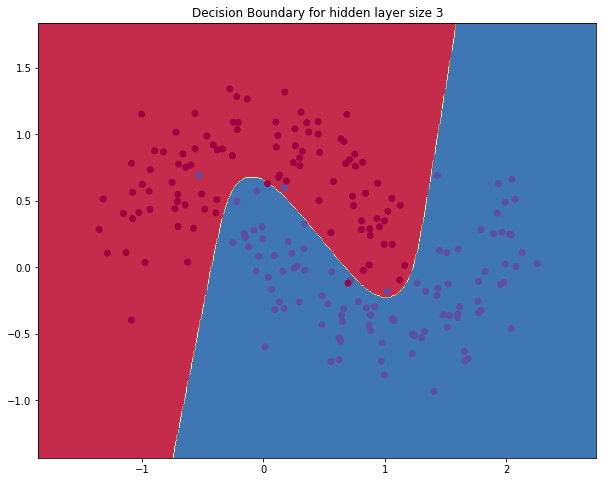

In [21]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

This looks pretty good. Our neural networks was able to find a decision boundary that successfully separates the classes.

## Varying the hidden layer size
In the example above we picked a hidden layer size of 3. Let's now get a sense of how varying the hidden layer size affects the result.

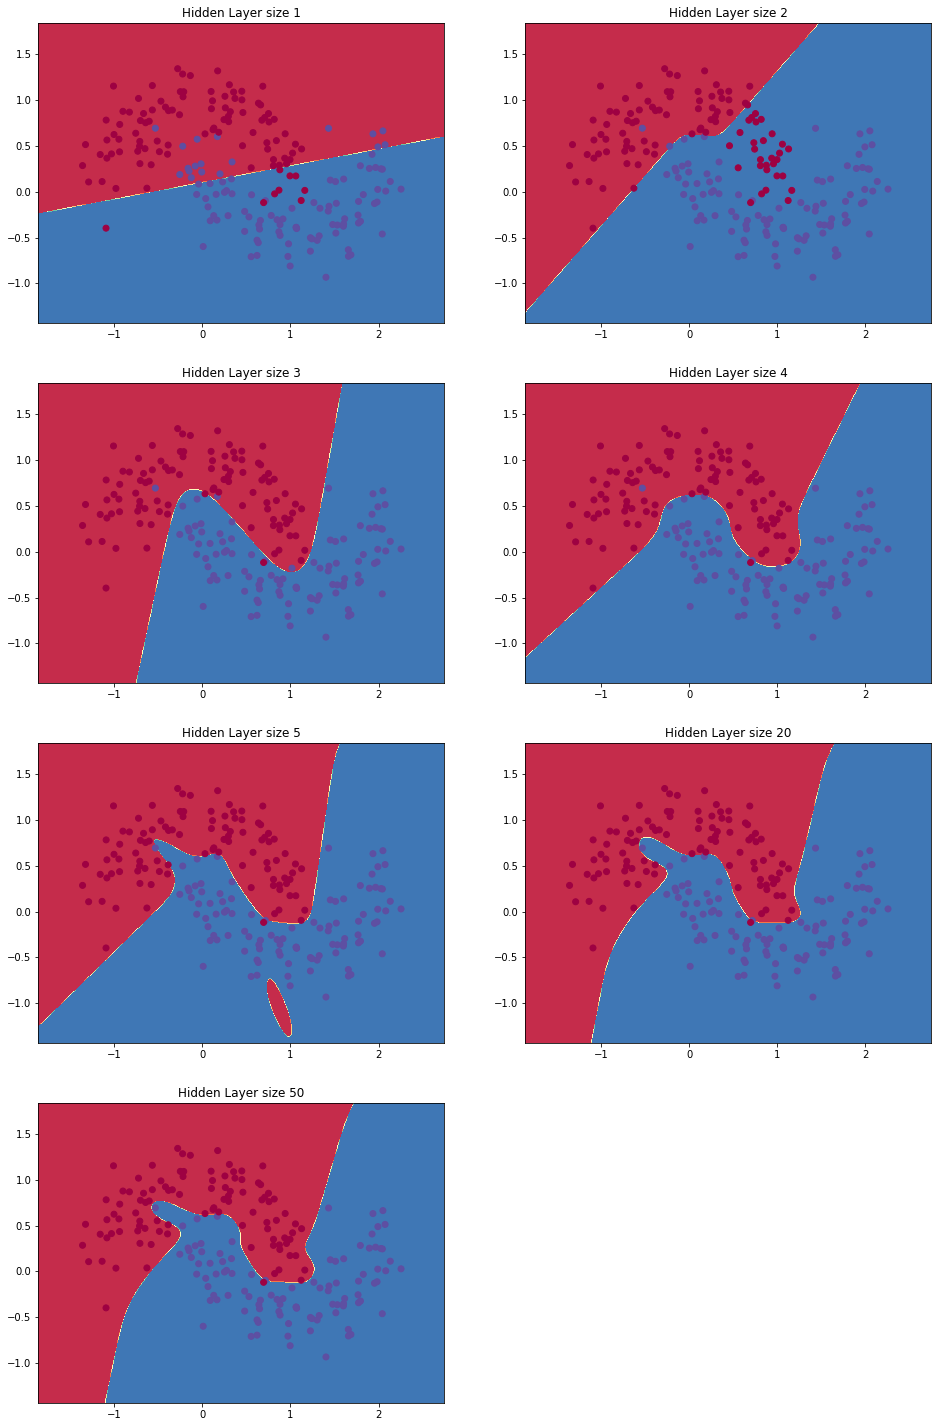

In [22]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

We can see that while a hidden layer of low dimensionality nicely capture the general trend of our data, but higher dimensionalities are prone to overfitting. They are "memorizing" the data as opposed to fitting the general shape. If we were to evaluate our model on a separate test set (and you should!) the model with a smaller hidden layer size would likely perform better because it generalizes better. We could counteract overfitting with stronger regularization, but picking the correct size for hidden layer is a much more "economical" solution.

# Conclusion
In this tutorial we studied about what is artificial neural network and it's functioning. We implemented neural networks from scratch and evaluated it's performance by comparing it with Machine Learning Algorithm(Logistics Regression). 
We can also implement Neural Networks with the help of various libraries or frameworks like Tensorflow,Theano,Keras,Pytorch etc.